In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import jax.scipy.optimize as jax_opt
import get_initialization_cond as init
import optimization_SPDC as opt
import optimization_SPDC_gaussain_pump as gauss_opt

np.random.seed(0)
key = jax.random.PRNGKey(0)

In [8]:
# Set hyper parameters
wi = -8
wf = 8
N = 501
vp = 0.1
l = 1
Np = 0.002
w = jnp.linspace(2*wi, 2*wf, 2*N)
x = jnp.linspace(wi, wf, N)
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N=N)

In [3]:
# Initialize weights
init_params = [0, 1, 1, jnp.pi/3]
theta = init.get_initialization_array(init_params, vp, l, wi, wf, Np, N = N)
theta_gauss = jnp.array([1,1,jnp.pi/3])

In [4]:
# Optimize for arbitrary pump shape
y_N = 1
optimized_theta = (jax_opt.minimize(opt.get_loss, theta,args=(N, alpha, G, H, l, y_N), method = "BFGS")).x
optimal_arbitrary_pump = optimized_theta

In [5]:
# Optimize for gaussian pump shape
optimized_theta_gauss = (jax_opt.minimize(gauss_opt.get_loss, theta_gauss,args=(w, alpha, G, H, l, y_N), method = "BFGS")).x
optimal_gauss_pump = optimized_theta_gauss[0]*jnp.exp(-(w*optimized_theta_gauss[1])**2)*jnp.exp(1j*optimized_theta_gauss[2])

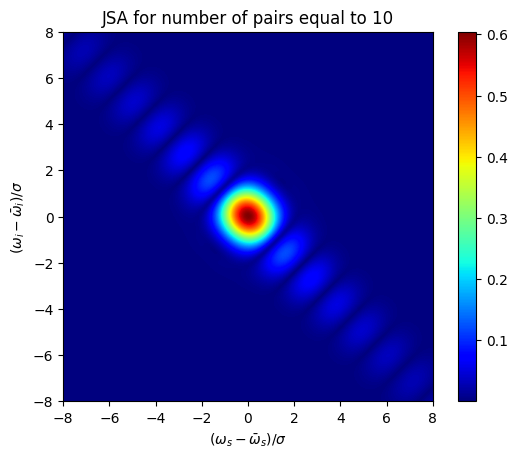

In [18]:
# Get JSA for arbitrary shape
JSA = opt.get_JSA(x, optimized_theta, N, alpha, G, H, l)
fig, ax = plt.subplots()
im = ax.imshow(JSA, cmap = "jet", origin = "lower", extent=[x[0],x[N-1],x[0],x[N-1]])
ax.set_title("JSA for number of pairs equal to 10")
ax.set_xlabel(r"$(\omega_{s}-\bar{\omega}_{s})/\sigma$")
ax.set_ylabel(r"$(\omega_{i}-\bar{\omega}_{i})/\sigma$")
plt.colorbar(im, orientation="vertical")
plt.savefig("optimized_pump_10_N.pdf")
plt.show()

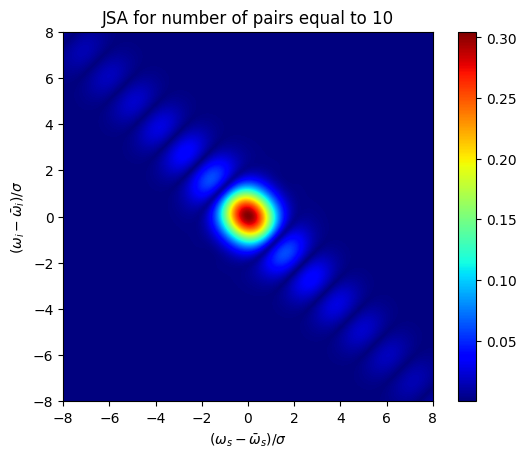

In [20]:
# Get JSA for gaussian shape
JSA = gauss_opt.get_JSA(optimized_theta_gauss, w, alpha, G, H, l)
fig, ax = plt.subplots()
im = ax.imshow(JSA, cmap = "jet", origin = "lower", extent=[x[0],x[N-1],x[0],x[N-1]])
ax.set_title("JSA for number of pairs equal to 10")
ax.set_xlabel(r"$(\omega_{s}-\bar{\omega}_{s})/\sigma$")
ax.set_ylabel(r"$(\omega_{i}-\bar{\omega}_{i})/\sigma$")
plt.colorbar(im, orientation="vertical")
plt.savefig("optimized_pump_10_N.pdf")
plt.show()